# Getting Started

In [149]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data into DataFrame

In [150]:
train_df = pd.read_csv('./data/training_dataset.csv')
train_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


**Shape of Training Data:**

In [151]:
print(f"Number of rows: {train_df.shape[0]}\nNumber of columns: {train_df.shape[1]}") 

Number of rows: 550176
Number of columns: 8


## Exploring Data

In [152]:
train_df.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

#### From the above table, we can observe that there are no missing values in our dataset. That's a good sign, as we don't have to worry about filling in missing data. 

### Renaming Column to avoid Confusion
There are two columns "ProductType" and "Product Type". To avoid confusion, we will rename the first one as Product Name.

In [153]:
train_df.rename(columns={"ProductType": "Product Name"}, inplace= True)

### Data Information

In [154]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Product Name       550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


#### Only the Sourcing Cost column is numerical, rest columns are categorical data.

In [155]:
print("Summary Statistics for Categorical Columns:")
train_df.describe(include=['object'])

Summary Statistics for Categorical Columns:


,Product Name,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing
count,550176,550176,550176,550176,550176,550176,550176
unique,3,3,45,4,3,2,11
top,NTM2,X1,A28,DIRECT,Large,Powder,Nov-20
freq,236726,419857,41925,453617,325566,471593,60446


# EDA: Univariate Analysis

#### As observed, the column "ProductType" has 3 unique values NTM1, NTM2 and NTM3 with the following distribution

In [156]:
train_df['Product Name'].value_counts()

Product Name
NTM2    236726
NTM1    194923
NTM3    118527
Name: count, dtype: int64

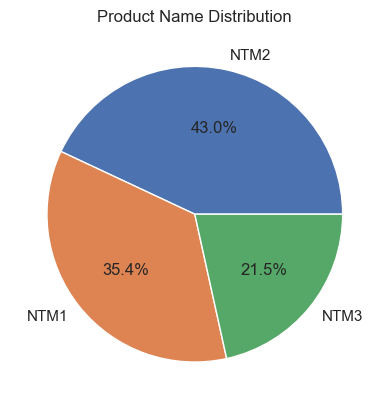

In [157]:
train_df['Product Name'].value_counts().plot(kind="pie", autopct='%1.1f%%', ylabel='')
plt.title('Product Name Distribution')
plt.show()

**Insight: NTM2 was the most sourced product ordered 236726 times followed by NTM1 and NTM3.**

In [158]:
train_df['Manufacturer'].value_counts()

Manufacturer
X1    419857
X2    120695
X3      9624
Name: count, dtype: int64

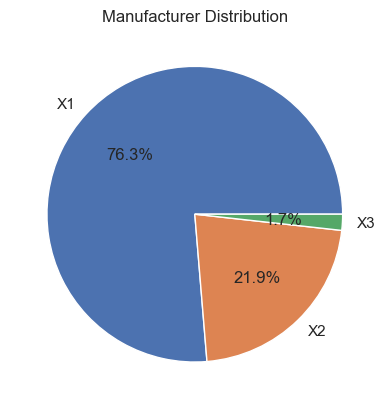

In [159]:
# Plotting a Pie Chart
manufacturer_counts = train_df['Manufacturer'].value_counts()
sns.set(style="whitegrid")

# Plotting the pie chart
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%')

plt.title('Manufacturer Distribution')  # Set the title of the plot
plt.show()  # Display the plot


**Insight: 76.3 % of all sourcing comes from Manufacturer X1, followed by 21.9% from X2, and only 1.7% from X3.**

#### There are 45 different Area Codes with the following distribution. 

In [160]:
train_df['Area Code'].value_counts()

Area Code
A28    41925
A7     36723
A3     33247
A11    31111
A8     28772
A44    26490
A5     24252
A10    22970
A25    20422
A31    18379
A29    18105
A16    15938
A12    14547
A40    13820
A21    13374
A43    13234
A2     13145
A1     12676
A6     12399
A4     11326
A24    10725
A18    10154
A9     10107
A22     9624
A14     9424
A35     8877
A45     8188
A13     7548
A42     6470
A33     5769
A15     5496
A32     5408
A36     4843
A34     4249
A19     3839
A38     3065
A26     2360
A30     2357
A20     2126
A46     1732
A39     1702
A37     1432
A17     1139
A23      569
A41      118
Name: count, dtype: int64

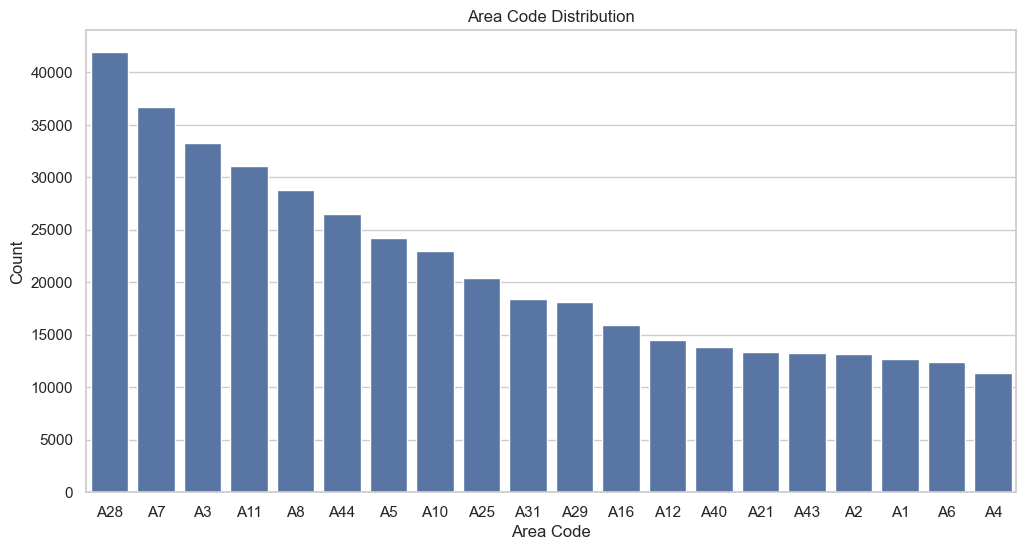

In [161]:
# Displaying the top 20 Area Codes by count (per order)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(x=train_df['Area Code'].value_counts().index[:20], y=train_df['Area Code'].value_counts()[:20])

plt.title('Area Code Distribution') 
plt.xlabel('Area Code')  
plt.ylabel('Count')  

plt.show()  

**Insight: These are the top 20 most sourced Area Codes from where products come.**

In [162]:
train_df['Sourcing Channel'].value_counts()

Sourcing Channel
DIRECT       453617
RETAIL        60011
ECOM          31106
WHOLESALE      5442
Name: count, dtype: int64

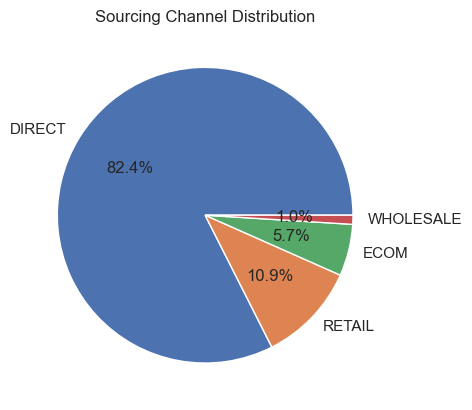

In [163]:
train_df['Sourcing Channel'].value_counts().plot(kind="pie", autopct='%1.1f%%', ylabel='')
plt.title('Sourcing Channel Distribution')
plt.show()

**Insight: 82.4% of sourcing is direct, followed by 10.9% from Retail, 5.7% from E-commerce, and only a mere 1% from Wholesale channel.**

In [164]:
train_df['Product Size'].value_counts()

Product Size
Large         325566
Small         220462
ExtraLarge      4148
Name: count, dtype: int64

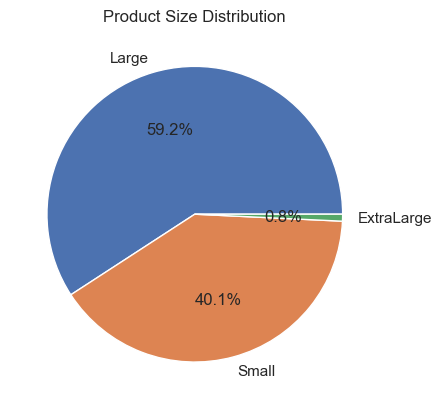

In [165]:
train_df['Product Size'].value_counts().plot(kind="pie", autopct='%1.1f%%', ylabel='')
plt.title('Product Size Distribution')
plt.show()

**Insight: Large and small sizes of Product are mostly sourced. Sourcing of ExtraLarge Products is rare with 0.8% of all sourcing.**

In [166]:
train_df['Product Type'].value_counts()

Product Type
Powder    471593
Liquid     78583
Name: count, dtype: int64

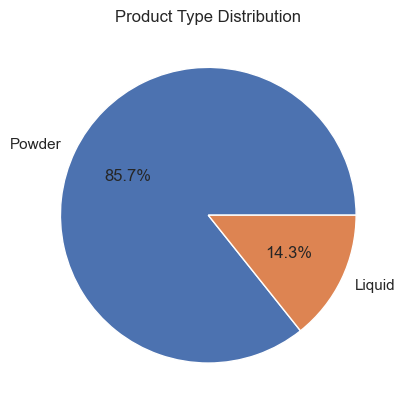

In [167]:
train_df['Product Type'].value_counts().plot(kind="pie", autopct='%1.1f%%', ylabel='')
plt.title('Product Type Distribution')
plt.show()

**Insight: 85.7% of products are in powder form, while the rest 14.3% are liquid.**

In [168]:
train_df['Month of Sourcing'].value_counts()

Month of Sourcing
Nov-20    60446
Mar-21    56643
May-21    53172
Dec-20    52752
Apr-21    52438
Jan-21    50844
Feb-21    50562
Oct-20    46215
Sep-20    43995
Jul-20    42469
Aug-20    40640
Name: count, dtype: int64

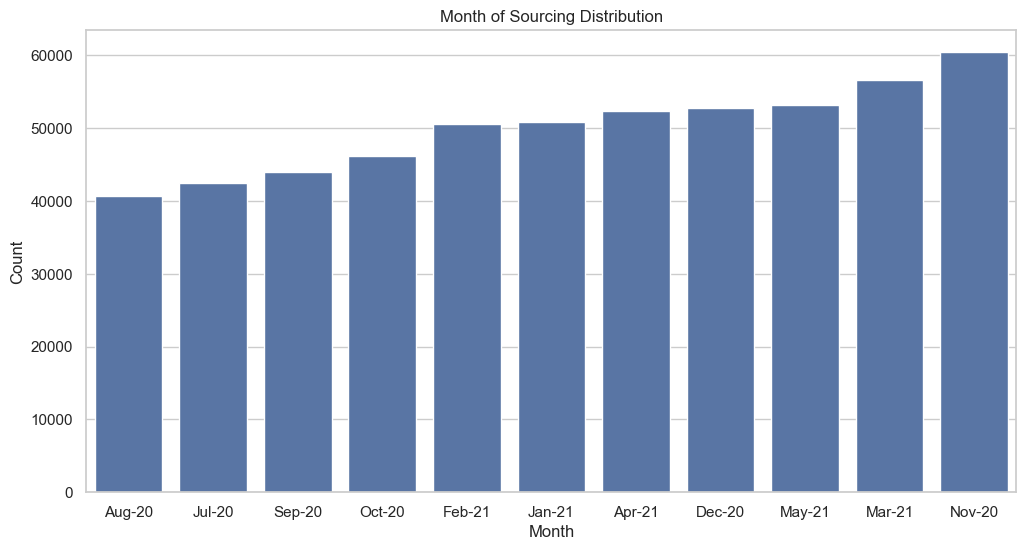

In [169]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.set_style("whitegrid")

sns.barplot(x=train_df['Month of Sourcing'].value_counts().index[::-1], y=train_df['Month of Sourcing'].value_counts()[::-1])

plt.title('Month of Sourcing Distribution') 
plt.xlabel('Month')  
plt.ylabel('Count')  

plt.show()  

**Insight: We have 11 months of data from July 2020 to May 21. The distribution of total products sourced per month is plotted above in increasing order.**

In [170]:
train_df['Sourcing Cost'].describe()

count    550176.000000
mean        108.817286
std         104.390093
min        -196.070000
25%          57.000000
50%         132.000000
75%         146.150000
max       32632.500000
Name: Sourcing Cost, dtype: float64

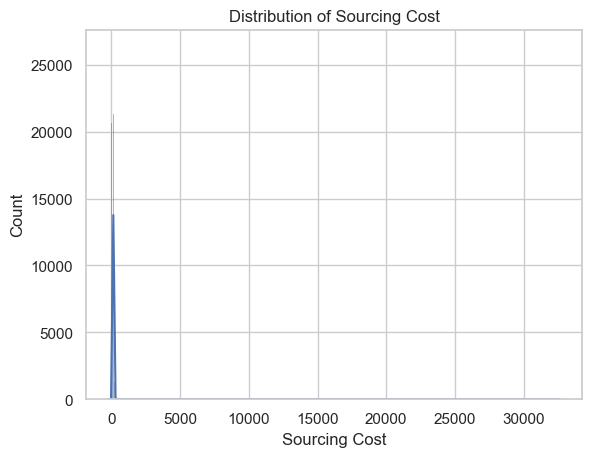

In [171]:
# PLotting a histogram to visualize the distribution of Sourcing Cost (Numerical Variable)
sns.histplot(train_df['Sourcing Cost'], kde=True)

plt.title('Distribution of Sourcing Cost') 
plt.xlabel('Sourcing Cost')

plt.show()

#### Seems like there are a lot of outlier values, that's why the plot is getting extended to the right so much.

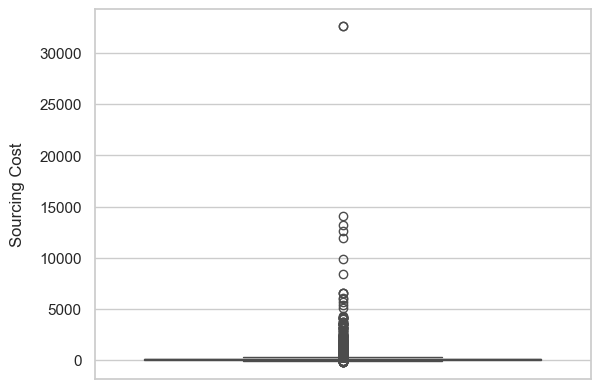

In [172]:
# Find out Outliers by using boxplot
sns.boxplot(data=train_df['Sourcing Cost'])
plt.ylabel('Sourcing Cost', labelpad = 10)
plt.show() 

**To identify and remove outliers, we can take two approaches:**
* Z-score
* InterQuartile Range (IQR)
  
Z-score is used for Normally distributed Data. Since our data is not normally-distributed and highly skewed, we will use IQR.

In [173]:
# Calculate skewness
skewness = train_df['Sourcing Cost'].skew()
print(f"Skewness: {skewness}")

# Identify outliers using IQR (InterQuartile Range)
Q1 = train_df['Sourcing Cost'].quantile(0.25)
Q3 = train_df['Sourcing Cost'].quantile(0.75)
IQR = Q3 - Q1 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("Inter Quartile Range:", round(IQR, 2))
print("Lower Threshold:", round(lower_bound, 2))
print("Upper Threshold:", round(upper_bound, 2))

Skewness: 131.9235599905821
Q1: 57.0
Q3: 146.15
Inter Quartile Range: 89.15
Lower Threshold: -76.73
Upper Threshold: 279.88


Positive value of skewness means the variable is positively skewed (towards the right end).

## Removing Outliers

In [174]:
train_df = train_df[(train_df['Sourcing Cost'] >= lower_bound) & (train_df['Sourcing Cost'] <= upper_bound)]

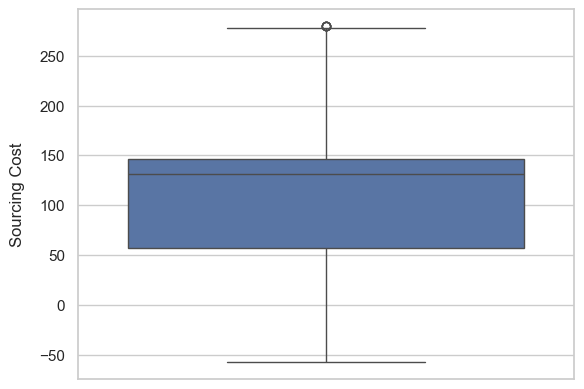

In [175]:
# Find out Outliers again
sns.boxplot(data=train_df['Sourcing Cost'])
plt.ylabel('Sourcing Cost', labelpad = 10)
plt.show()  # Display the plot

**We can observe that now there are no outliers present in our data.**

In [176]:
train_df.shape

(547510, 8)

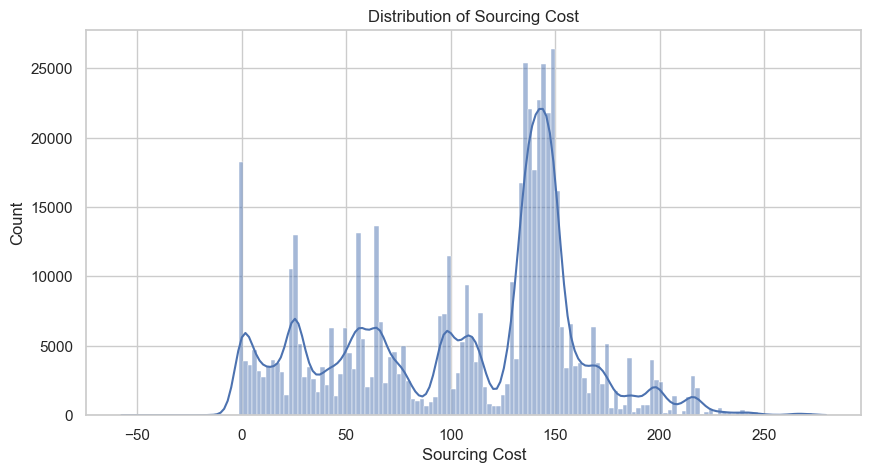

In [177]:
plt.figure(figsize=(10,5))
sns.histplot(train_df['Sourcing Cost'], kde=True)

plt.title('Distribution of Sourcing Cost')  # Set the title of the plot
plt.xlabel('Sourcing Cost')  # Set the label for the x-axis

plt.show()

**Exploring Rows with Negative Sourcing Cost. (The manufacturer pays us to get the product)**

In [178]:
negative_values = train_df[train_df['Sourcing Cost'] < 0]
print(f"There are a told of {negative_values.shape[0]} rows whose Sourcing Cost is negative.")

There are a told of 170 rows whose Sourcing Cost is negative.


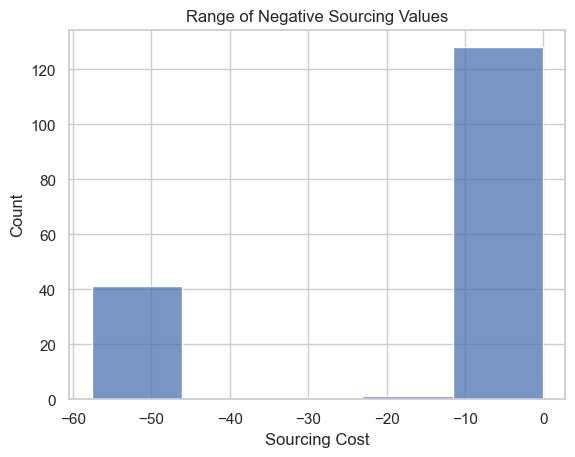

In [179]:
sns.histplot(data=negative_values, x='Sourcing Cost', bins=5, kde=False)
plt.title('Range of Negative Sourcing Values')
plt.show()

# Our data is free from Outliers now.

In [180]:
#train_df.to_csv('Train Data without Outliers.csv')

#### We have 6 categorical columns, and 1 Month column. From these, we have to predict Sourcing Cost.

# Finding Unique Product Combinations

In [181]:
# Looking at all the columns in our training data.
train_df.columns

Index(['Product Name', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

#### Creating a new Column "Product Combination"

In [182]:
train_df['Product Combination'] = train_df['Product Name'] + '_' + train_df['Manufacturer'] + '_' + train_df['Area Code'] + '_' + train_df['Sourcing Channel'] + '_' + train_df['Product Size'] + '_' + train_df['Product Type']

In [183]:
train_df['Product Combination'].value_counts()

Product Combination
NTM2_X2_A31_DIRECT_Large_Powder       16900
NTM2_X1_A5_DIRECT_Large_Powder        15878
NTM2_X1_A16_DIRECT_Small_Powder       15783
NTM3_X1_A28_DIRECT_Small_Powder       15537
NTM1_X2_A12_DIRECT_Large_Powder       14547
                                      ...  
NTM2_X1_A37_DIRECT_Small_Powder         399
NTM2_X1_A38_RETAIL_Large_Powder         324
NTM2_X1_A32_RETAIL_Small_Powder         142
NTM2_X1_A32_RETAIL_Large_Powder         118
NTM2_X1_A41_WHOLESALE_Small_Powder      118
Name: count, Length: 96, dtype: int64

**Insight: We can observe that we have 96 unique combinations of products.**

In [184]:
# Calculate the sum of Sourcing Cost for each product combination
sourcing_cost_sum = train_df.groupby('Product Combination')['Sourcing Cost'].sum().reset_index()

In [185]:
sourcing_cost_sum.head()

,Product Combination,Sourcing Cost
0,NTM1_X1_A10_DIRECT_Large_Powder,835603.77
1,NTM1_X1_A10_ECOM_Large_Powder,344331.06
2,NTM1_X1_A11_DIRECT_Large_Powder,1718656.88
3,NTM1_X1_A1_DIRECT_Small_Powder,1304024.55
4,NTM1_X1_A28_DIRECT_Small_Powder,85661.60


### Finding Total Minimum and Maximum Sourcing Cost for Unique Product Combination and,
### Least and Most Ordered Product Combination.

In [186]:
min_sourcing_cost_row = sourcing_cost_sum.loc[sourcing_cost_sum['Sourcing Cost'].idxmin()]
max_sourcing_cost_row = sourcing_cost_sum.loc[sourcing_cost_sum['Sourcing Cost'].idxmax()]

# Count the number of occurrences of each Product Combination in train_df
min_product_count = (train_df['Product Combination'] == min_sourcing_cost_row['Product Combination']).sum()
max_product_count = (train_df['Product Combination'] == max_sourcing_cost_row['Product Combination']).sum()

count_data = train_df['Product Combination'].value_counts().sort_values()

print(f"Minimum Sourcing Cost: {min_sourcing_cost_row['Sourcing Cost']} for the product: {min_sourcing_cost_row['Product Combination']} ordered {min_product_count} times.")
print(f"Maximum Sourcing Cost: {max_sourcing_cost_row['Sourcing Cost']} for the product: {max_sourcing_cost_row['Product Combination']} ordered {max_product_count} times.\n")

print(f"Least ordered Product Combination: {count_data.index[0]} ordered {count_data.iloc[0]} times.")
print(f"Most ordered Product Combination: {count_data.index[-1]} ordered {count_data.iloc[-1]} times.")

Minimum Sourcing Cost: 5838.6 for the product: NTM2_X1_A32_RETAIL_Small_Powder ordered 142 times.
Maximum Sourcing Cost: 2286673.06 for the product: NTM2_X1_A5_DIRECT_Large_Powder ordered 15878 times.

Least ordered Product Combination: NTM2_X1_A41_WHOLESALE_Small_Powder ordered 118 times.
Most ordered Product Combination: NTM2_X2_A31_DIRECT_Large_Powder ordered 16900 times.


### Average Sourcing Cost for Cheapest and Costliest Product Combination

In [187]:
# Calculate the average sourcing cost for each product combination
average_sourcing_cost = train_df.groupby('Product Combination')['Sourcing Cost'].mean()
min_avg_cost, max_avg_cost = 1000, 0
min_product, max_product = "", ""
# Print the average sourcing cost for each product combination
for product_combination, avg_cost in average_sourcing_cost.items():
    # print(f"Average Sourcing Cost for {product_combination}: {avg_cost}")
    if avg_cost < min_avg_cost:
        min_avg_cost = avg_cost
        min_product = product_combination
    elif avg_cost > max_avg_cost:
        max_avg_cost = avg_cost
        max_product = product_combination
    
print(f"Cheapest Product: {min_product} with average sourcing cost: {min_avg_cost}")
print(f"Most Expensive Product: {max_product} with average sourcing cost: {max_avg_cost}")

Cheapest Product: NTM3_X1_A14_DIRECT_Large_Liquid with average sourcing cost: 16.139851443123938
Most Expensive Product: NTM1_X2_A42_DIRECT_Large_Powder with average sourcing cost: 221.1918138138138


# Visualizing the Distribution of Sourcing Cost by Columns

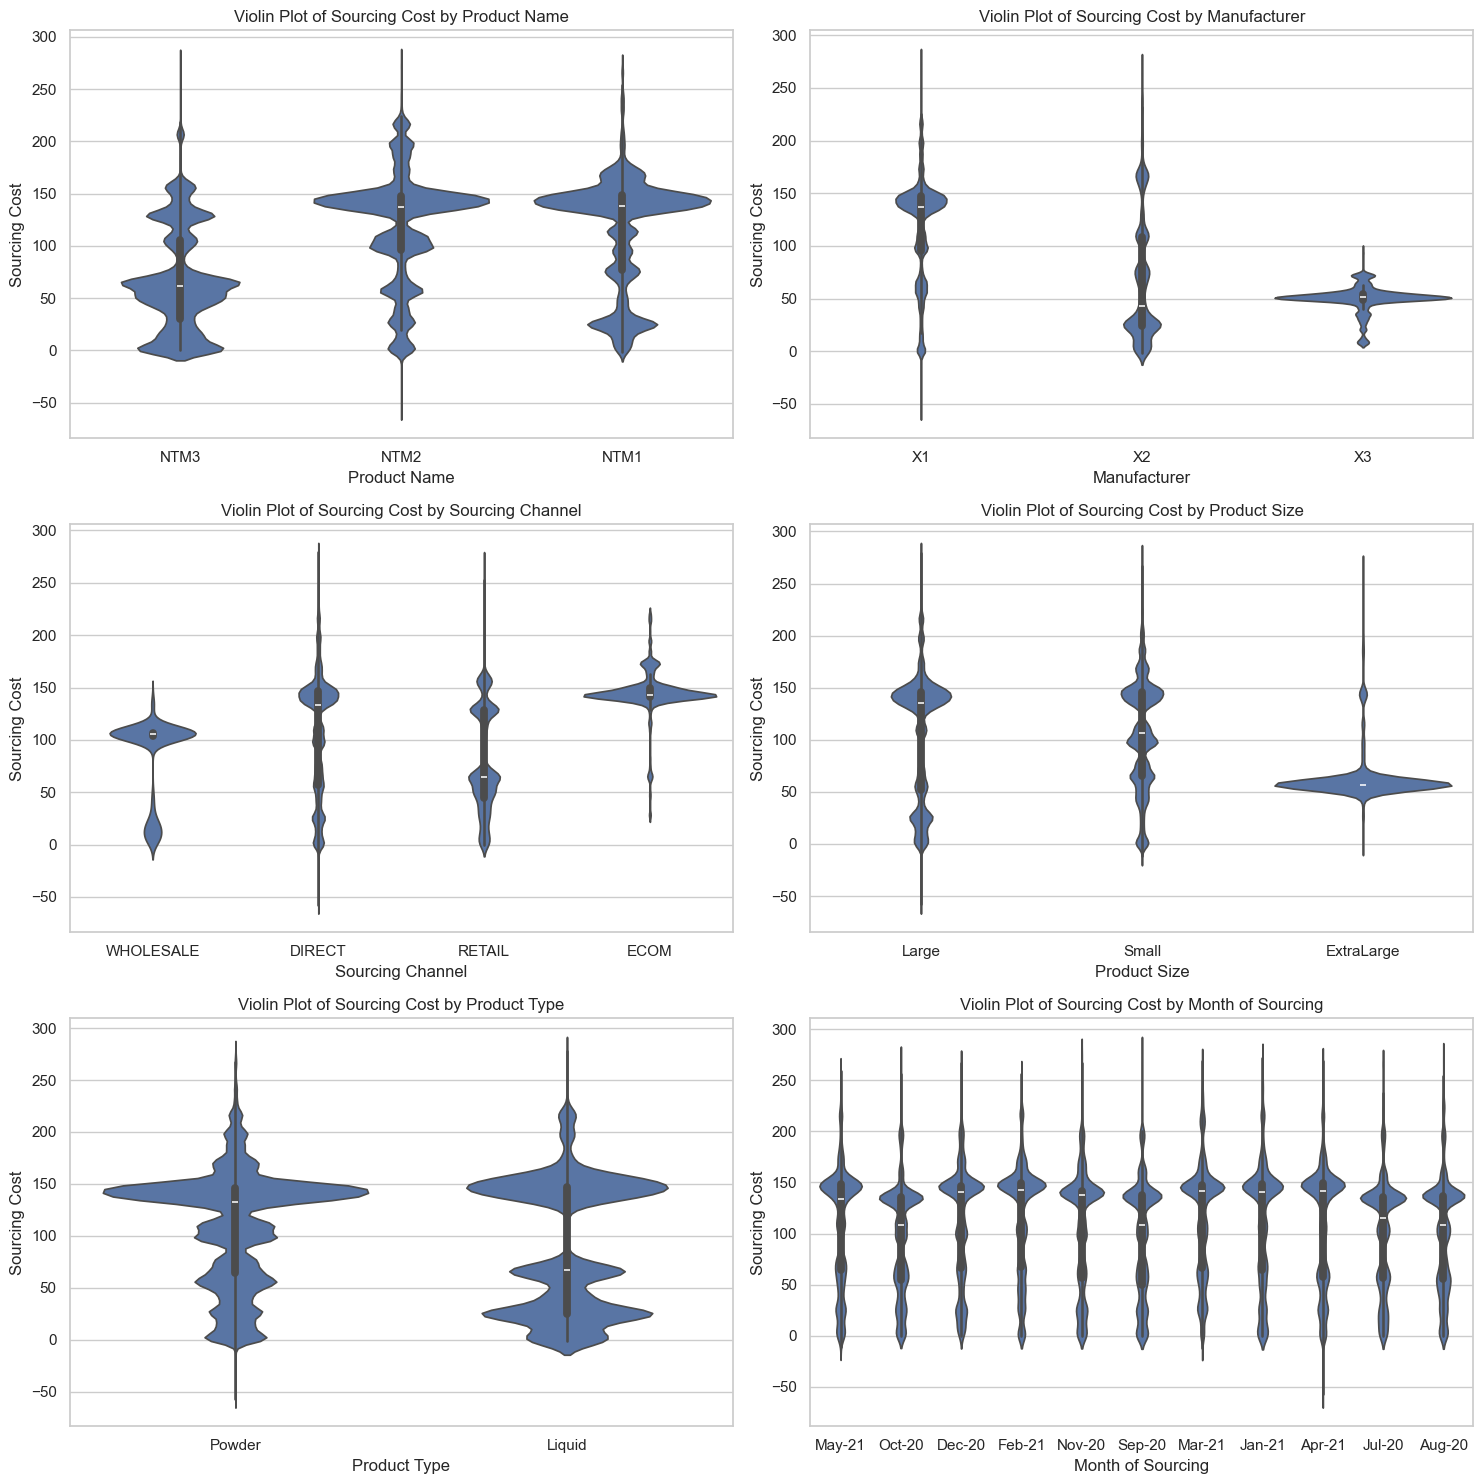

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generating violin plots for 'Sourcing Cost' by categorical variables
categorical_cols = ['Product Name', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']

# Calculate the number of rows and columns for subplots
num_cols = 2
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each categorical column
for i, col in enumerate(categorical_cols):
    # Generate violin plot for current column
    sns.violinplot(x=col, y='Sourcing Cost', data=train_df, ax=axes[i])
    axes[i].set_title(f'Violin Plot of Sourcing Cost by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Sourcing Cost')

# Hide any empty subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout
plt.show()


# EDA (MultiVariate Analysis)

### Plotting Average Sourcing Cost by Product Name and Manufacturer.

In [190]:
avg_sourcing_cost = train_df.groupby(['Product Name', 'Manufacturer'])['Sourcing Cost'].mean().reset_index()
avg_sourcing_cost.value_counts()

Product Name  Manufacturer  Sourcing Cost
NTM1          X1            136.451191       1
              X2            76.651851        1
NTM2          X1            135.315742       1
              X2            55.911175        1
NTM3          X1            68.612040        1
              X2            55.415433        1
              X3            49.890437        1
Name: count, dtype: int64

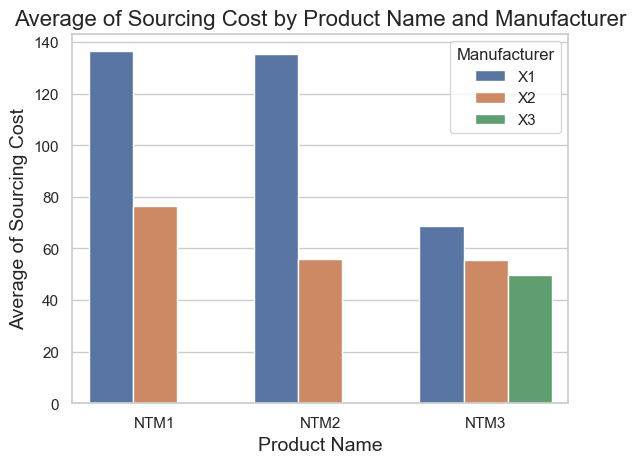

In [191]:
fig, ax = plt.subplots()

sns.barplot(x='Product Name', y='Sourcing Cost', hue='Manufacturer', data=avg_sourcing_cost, ax=ax)

ax.set_title('Average of Sourcing Cost by Product Name and Manufacturer', fontsize=16)
ax.set_xlabel('Product Name', fontsize=14)
ax.set_ylabel('Average of Sourcing Cost', fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks()

# Display the plot
plt.show()

### Average of Sourcing Cost by Product Name and Sourcing Channel.

In [192]:
avg_sourcing_cost_by_channel = train_df.groupby(['Product Name', 'Sourcing Channel'])['Sourcing Cost'].mean().reset_index()

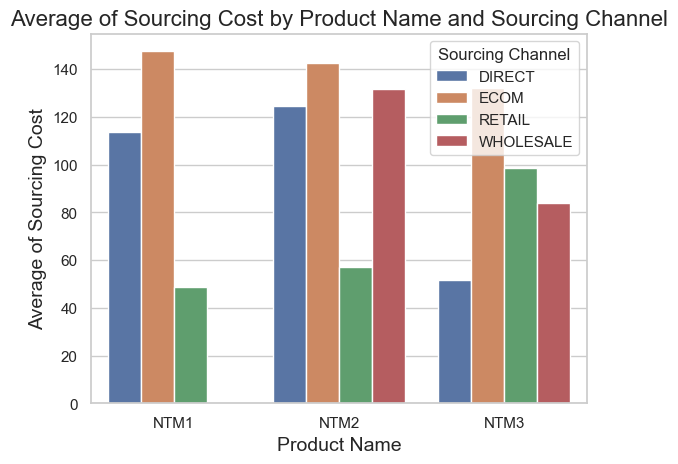

In [193]:
fig, ax = plt.subplots()

sns.barplot(x='Product Name', y='Sourcing Cost', hue='Sourcing Channel', data=avg_sourcing_cost_by_channel, ax=ax)

ax.set_title('Average of Sourcing Cost by Product Name and Sourcing Channel', fontsize=16)
ax.set_xlabel('Product Name', fontsize=14)
ax.set_ylabel('Average of Sourcing Cost', fontsize=14)

plt.xticks()

# Display the plot
plt.show()

### Average Sourcing Cost month-wise Growth 

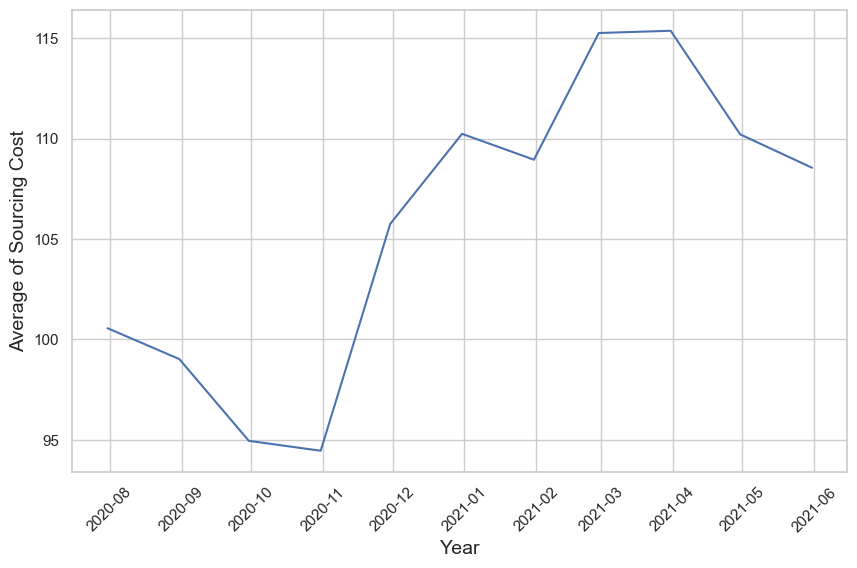

In [194]:
train_df['Month of Sourcing'] = pd.to_datetime(train_df['Month of Sourcing'], format='%b-%y')

# Calculate the average sourcing cost for each month
avg_sourcing_cost_by_month = train_df.groupby(pd.Grouper(key='Month of Sourcing', freq='ME'))['Sourcing Cost'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(avg_sourcing_cost_by_month['Month of Sourcing'], avg_sourcing_cost_by_month['Sourcing Cost'])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average of Sourcing Cost', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Insight: The Sourcing Cost is the lowest in the months october and november 2020, after which it increases drastically in Decemeber 2020. That may indicate that sourcing cost of product decreases in winter.**

### Count of Products Sourced Month-wise Growth

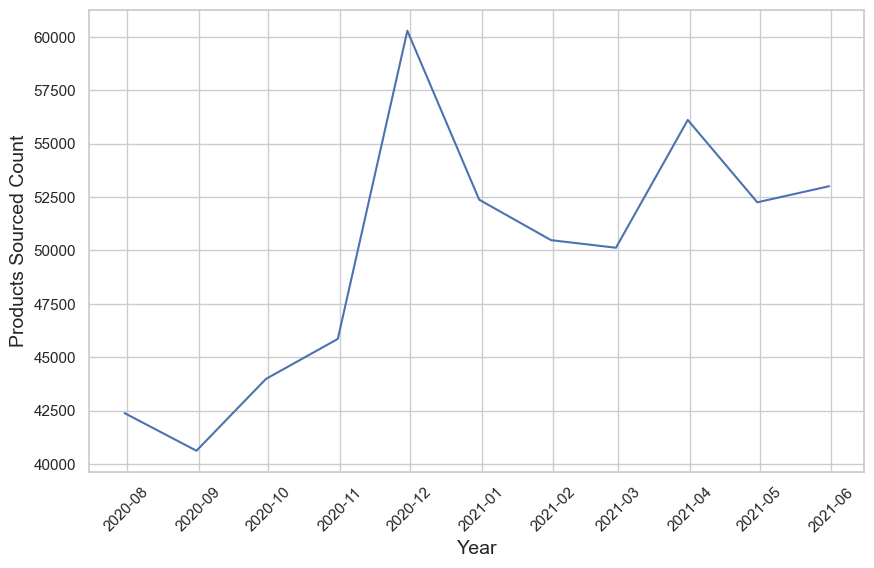

In [195]:
product_count = train_df.groupby(pd.Grouper(key='Month of Sourcing', freq='ME'))['Product Name'].count().reset_index()
product_count.value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(product_count['Month of Sourcing'], product_count['Product Name'])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Products Sourced Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Insight: We can observe that the count of products sourced around winter (August to November) decreases and is comparitively low. From the previous graph, we also observed that Costs of sourcing falls down in winter. This may indicate that demand for products decreases in winter, hence manufacturers may also decrease the sourcing cost in winter.**

### Average Sourcing Cost by Sourcing Channel month-wise Growth 

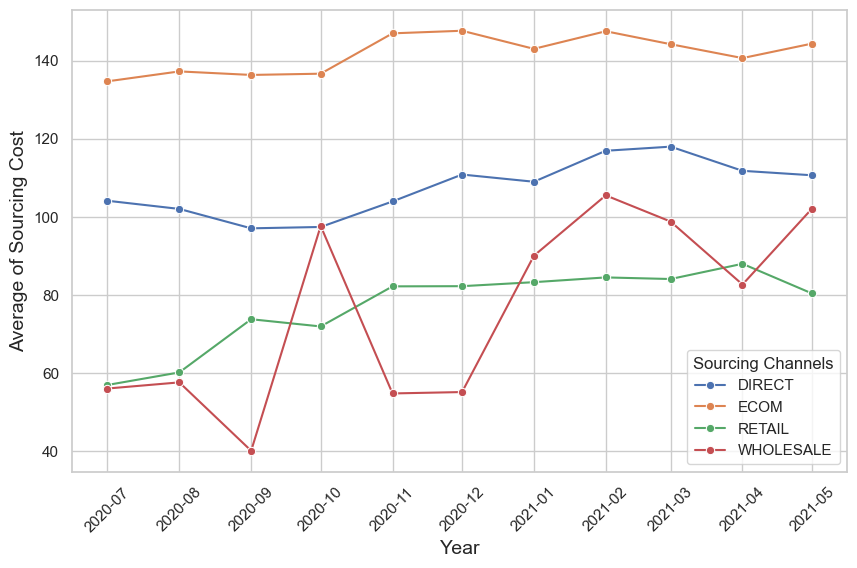

In [196]:
# Calculate the average sourcing cost for each month and channel
avg_sourcing_cost_by_month_channel = train_df.groupby(['Month of Sourcing', 'Sourcing Channel'])['Sourcing Cost'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

sns.lineplot(data=avg_sourcing_cost_by_month_channel, x='Month of Sourcing', y='Sourcing Cost', hue='Sourcing Channel', marker='o')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Average of Sourcing Cost', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sourcing Channels')
plt.show()

**Insight: Sourcing Costs through E-commerce channels are the most costly, followed by Direct channels, and the sourcing costs of retail and wholesale channel generally fluctuate throughout the year.**

# Feature Engineering

In [197]:
# What new data can we form?
import pandas as pd

# Extract year and month from 'Month of Sourcing'
train_df['Year'] = pd.to_datetime(train_df['Month of Sourcing'], format='%b-%y').dt.year
train_df['Month'] = pd.to_datetime(train_df['Month of Sourcing'], format='%b-%y').dt.month

In [198]:
train_df.head()

,Product Name,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Product Combination,Year,Month
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16,NTM3_X1_A28_WHOLESALE_Large_Powder,2021,5
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28,NTM2_X1_A9_DIRECT_Large_Powder,2020,10
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46,NTM3_X2_A20_DIRECT_Large_Powder,2020,12
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22,NTM3_X1_A18_WHOLESALE_Small_Powder,2021,2
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76,NTM2_X1_A28_DIRECT_Large_Liquid,2020,11


# Encoding Categorical Data using Label Encoding

### We use Label Encoding as One-hot Encoding generates a new column for a new value, hence increasing the dimensionality and making the data more complicated.

In [199]:
from sklearn.preprocessing import LabelEncoder

# Assuming your data is in a DataFrame called 'data'

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the categorical variables
train_df['Product Name'] = label_encoder.fit_transform(train_df['Product Name'])
train_df['Manufacturer'] = label_encoder.fit_transform(train_df['Manufacturer'])
train_df['Area Code'] = label_encoder.fit_transform(train_df['Area Code'])
train_df['Sourcing Channel'] = label_encoder.fit_transform(train_df['Sourcing Channel'])
train_df['Product Size'] = label_encoder.fit_transform(train_df['Product Size'])
train_df['Product Type'] = label_encoder.fit_transform(train_df['Product Type'])

In [200]:
train_df.head()

,Product Name,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Product Combination,Year,Month
0,2,0,19,3,1,1,2021-05-01,10.16,NTM3_X1_A28_WHOLESALE_Large_Powder,2021,5
1,1,0,44,0,1,1,2020-10-01,134.28,NTM2_X1_A9_DIRECT_Large_Powder,2020,10
2,2,1,12,0,1,1,2020-12-01,12.46,NTM3_X2_A20_DIRECT_Large_Powder,2020,12
3,2,0,9,3,2,1,2021-02-01,107.22,NTM3_X1_A18_WHOLESALE_Small_Powder,2021,2
4,1,0,19,0,1,0,2020-11-01,197.76,NTM2_X1_A28_DIRECT_Large_Liquid,2020,11


In [201]:
# Do not run again
train_df.drop(['Month of Sourcing', 'Product Combination'], axis=1, inplace = True)

# Feature Selection

In [202]:
train_df.columns

Index(['Product Name', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Sourcing Cost', 'Year', 'Month'],
      dtype='object')

# Calculating Correlation

In [203]:
correlations = train_df.corr()['Sourcing Cost'].abs()
print(correlations)

Product Name        0.277755
Manufacturer        0.393142
Area Code           0.164420
Sourcing Channel    0.113113
Product Size        0.001392
Product Type        0.135255
Sourcing Cost       1.000000
Year                0.092488
Month               0.070722
Name: Sourcing Cost, dtype: float64


# Feature Selection using RFE

RFE is a feature selection technique in machine learning that automatically picks the most important features for a model by iteratively eliminating the least important ones.

In [204]:
#train_df.to_csv('Processed_Data.csv')

In [205]:
y_train = train_df['Sourcing Cost']

In [206]:
X_train = train_df.drop(['Sourcing Cost'], axis=1)

In [207]:
X_train.columns

Index(['Product Name', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Year', 'Month'],
      dtype='object')

# Using RFE (Recursive Feature Elimination)

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#linear regression model
model = LinearRegression()

# Create an RFE object
rfe = RFE(model, n_features_to_select=6)

fit = rfe.fit(X_train, y_train)

print("Selected Features:", X_train.columns[fit.support_])
print("Feature Ranking:", fit.ranking_)

Selected Features: Index(['Product Name', 'Manufacturer', 'Sourcing Channel', 'Product Size',
       'Product Type', 'Year'],
      dtype='object')
Feature Ranking: [1 1 3 1 1 1 1 2]


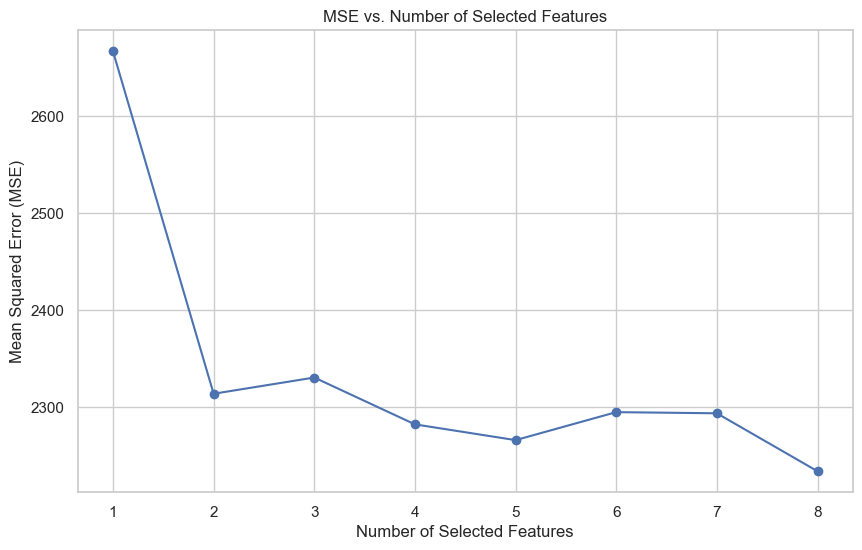

In [209]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()

# defining range of features from 1 to 9.
num_features_range = range(1, 9)

mse_scores = []

# Iterating through different numbers of selected features
for num_features in num_features_range:
    rfe = RFE(model, n_features_to_select=num_features)
    
    fit = rfe.fit(X_train, y_train)
    
    selected_features = X_train.columns[fit.support_]
    X_train_selected = X_train[selected_features]
    
    # Calculate cross-validation MSE scores
    cv_scores = -cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Calculate average MSE score
    avg_mse = np.mean(cv_scores)
    
    # Append the average MSE score to the list
    mse_scores.append(avg_mse)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(num_features_range, mse_scores, marker='o', linestyle='-')
plt.title('MSE vs. Number of Selected Features')
plt.xlabel('Number of Selected Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(num_features_range)
plt.grid(True)
plt.show()


**As we can see that the error is minimum when we take 8 (all) features in our training data. Let's Take all the 8 features as our input to the model.**

In [210]:
#X_train.to_csv('X_train.csv')
#y_train.to_csv('y_train.csv')

In [211]:
X_train.head()

,Product Name,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Year,Month
0,2,0,19,3,1,1,2021,5
1,1,0,44,0,1,1,2020,10
2,2,1,12,0,1,1,2020,12
3,2,0,9,3,2,1,2021,2
4,1,0,19,0,1,0,2020,11


Our Data is now ready to be applied to Regression Models.